## 개요

'유 키즈 온 더 블럭'은 연예인 뿐만 아니라 일반인도 참여하는 인기 예능프로그램입니다.
이 프로그램에 일반인이 출연할 경우 시청률은 어느 정도일까?

- '민형기 교수님이 출연하면 시청률은 어느 정도 일까?'

## 데이터

- [유 퀴즈 온 더 블럭 나무위키](https://namu.wiki/w/유%20퀴즈%20온%20더%20블럭)
- [유 퀴즈 온 더 블럭 유튜브 채널](https://www.youtube.com/channel/UC920m3pMPH45qztdhppZhwA)



**데이터 분석 및 예측:**

프로그램에 일반인이 출연한다면 이에 대한 시청률 예측을 위해 데이터를 분석할 수 있습니다. 예를 들어, 과거 유사한 프로그램에 일반인이 출연했을 때의 시청률 데이터나 연예인이 출연한 경우의 시청률 데이터를 분석하여 예측 모델을 구축할 수 있습니다.

또한, 프로그램의 콘셉트, 방송 시간, 경쟁 프로그램 등을 고려하여 예상되는 시청률을 더욱 정확하게 예측할 수 있습니다.

결론적으로, 일반인이 출연하는 경우 시청률은 다양한 요소에 의해 변동될 수 있으며, 정확한 예측을 위해서는 다양한 데이터와 분석이 필요합니다.


In [19]:
import pandas as pd

fin_data = pd.read_csv('./data/Fin.csv')

데이터 확인 

In [20]:
#데이터 확인

fin_data.head() # 필요없는 Unnamed: 0 컬럼 확인

,Unnamed: 0,출연자,제목,회차,조회수,좋아요수,댓글수,재생시간(초),구독자수,term,시청률,직업,성별,나이,수상여부,인지도
0,0,나영석,[선공개] 유퀴즈에 포위된 나영석 PD! 형이 왜 거기서 나와..?,40,881349,6186,224,314,0,1290,2.6,서비스,M,중년,Y,Y
1,1,이명진,드라마를 위해 조셉과 거래(?) 하는 이명진PD님 |,40,173,1,1,109,0,1290,2.6,서비스,M,청년,N,N
2,2,김부연,[#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...,41,593,4,1,394,0,1290,2.7,기타,F,중년,N,N
3,3,김유자,[#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...,41,593,4,1,394,0,1290,2.7,기타,F,청년,N,N
4,4,김만순,[#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...,41,593,4,1,394,0,1290,2.7,기타,F,노년,N,N


In [21]:
fin_data.drop(columns=['Unnamed: 0'], inplace=True) # Unnamed: 0 컬럼 삭제

In [22]:
fin_data.info()  # fin_data 에 대한 정보 확인  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   출연자      835 non-null    object 
 1   제목       835 non-null    object 
 2   회차       835 non-null    int64  
 3   조회수      835 non-null    int64  
 4   좋아요수     835 non-null    int64  
 5   댓글수      835 non-null    int64  
 6   재생시간(초)  835 non-null    int64  
 7   구독자수     835 non-null    object 
 8   term     835 non-null    int64  
 9   시청률      835 non-null    float64
 10  직업       835 non-null    object 
 11  성별       835 non-null    object 
 12  나이       835 non-null    object 
 13  수상여부     835 non-null    object 
 14  인지도      835 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 98.0+ KB


# 기본 통계 정보

In [23]:
# 기본 통계 정보
basic_stats = fin_data.describe()

# 결측치 확인
missing_values = fin_data.isnull().sum()

basic_stats, missing_values


(               회차           조회수          좋아요수           댓글수      재생시간(초)  \
 count  835.000000  8.350000e+02  8.350000e+02    835.000000   835.000000   
 mean   132.117365  3.927220e+05  4.969881e+03    300.385629   607.853892   
 std     55.398518  1.255166e+06  3.975016e+04   1207.918716   373.321006   
 min     40.000000  2.600000e+01  0.000000e+00      0.000000    86.000000   
 25%     84.500000  1.988700e+04  2.545000e+02     14.000000   251.500000   
 50%    132.000000  1.100850e+05  1.126000e+03     71.000000   586.000000   
 75%    178.000000  4.273520e+05  3.908500e+03    259.000000   931.500000   
 max    229.000000  3.209352e+07  1.137001e+06  31668.000000  1514.000000   
 
               term         시청률  
 count   835.000000  835.000000  
 mean    754.403593    4.335001  
 std     411.182723    1.064374  
 min      22.000000    2.009000  
 25%     379.000000    3.659000  
 50%     804.000000    4.422000  
 75%    1136.500000    4.988000  
 max    1290.000000    6.748000  

**기본 통계 정보**
- 1.fin_data는 결측치가 없습니다
- 2.회차는 40 회에서 229 회까지 저장 되어 있습니다. (코로나로 인한 플랫폼이 변경 되었습니다.)
- 3.조회수,좋아요수,댓글수 큰 범위의 값들을 가지고 있고 , 조회수와 좋아요 수는 매우 높은 최대값을 갖음
- 일부 콘텐츠가 특히 인기가 많음 -> 인기가 많은 연예인이 
- 4.term 과 시청률 역시 다양한 값을 가지고 있고 평균적  4.33 % 입니다

추가적으로 방영 당일 컬럼을 추가합니다.


In [42]:
fin2 = pd.read_csv('/Users/2suyeon/Desktop/zerobase/미니프로젝트/ML_Project/youquiz_Ml_project/data/person_elements_data.csv')

fin2.head()

,시즌,에피소드,날짜,주제,출연자,직업,시청률
0,1,1,2018-08-29,Step by Step,서유림 Sm Uzzal Sompa Sharin 임일빈 김명화 김태범 박희상,"1, 2, 3, 4, 5",2.3
1,1,2,2018-09-05,만남,김성중 박종훈 정재영 김성섭 최재이 길영인 양은영 이단비,"6, 7, 8, 9, 10, 11",1.9
2,1,3,2018-09-12,비와 당신,박현준 김정원 조아영 신호순 토토 Emo Ismail 김호진 양지훈 안혜진 ...,"13, 14, 15, 16, 17, 18, 19, 20",1.8
3,1,4,2018-09-19,Power Up,김재영 이화영 최혜원 정서현 김윤배 박시현 송경숙 문은경 이수민 김수현,"21, 22, 23, 24, 25, 26",1.9
4,1,5,2018-09-26,동네 한 바퀴,김수현 김지현 유광수 박현정 박누리 조가영 고효석 김종순 조부자 원정윤 ...,"29, 30, 31, 32, 33, 34, 35",1.5


In [43]:

fin_data['회차'] = fin_data['회차'].astype(int)
fin2['에피소드'] = fin2['에피소드'].astype(int)


merged_df = pd.merge(fin_data, fin2[['에피소드', '날짜']], left_on='회차', right_on='에피소드', how='left')


merged_df.head()


,출연자,제목,회차,조회수,좋아요수,댓글수,재생시간(초),구독자수,term,시청률,직업,성별,나이,수상여부,인지도,에피소드,날짜
0,나영석,[선공개] 유퀴즈에 포위된 나영석 PD! 형이 왜 거기서 나와..?,40,881349,6186,224,314,0,1290,2.6,서비스,M,중년,Y,Y,40,2019-10-22
1,이명진,드라마를 위해 조셉과 거래(?) 하는 이명진PD님 |,40,173,1,1,109,0,1290,2.6,서비스,M,청년,N,N,40,2019-10-22
2,김부연,[#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...,41,593,4,1,394,0,1290,2.7,기타,F,중년,N,N,41,2019-10-29
3,김유자,[#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...,41,593,4,1,394,0,1290,2.7,기타,F,청년,N,N,41,2019-10-29
4,김만순,[#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...,41,593,4,1,394,0,1290,2.7,기타,F,노년,N,N,41,2019-10-29


In [44]:
merged_df.to_csv('final_0213.csv', encoding='utf-8') # 저장해두기

In [45]:
merged_df.notnull().sum()

출연자        835
제목         835
회차         835
조회수        835
좋아요수       835
댓글수        835
재생시간(초)    835
구독자수       835
term       835
시청률        835
직업         835
성별         835
나이         835
수상여부       835
인지도        835
에피소드       835
날짜         835
dtype: int64

In [81]:

descriptive_stats_numeric = merged_df.describe()
descriptive_stats_categorical = merged_df.describe(include=['O'])  

descriptive_stats_numeric, descriptive_stats_categorical


(               회차           조회수          좋아요수           댓글수      재생시간(초)  \
 count  835.000000  8.350000e+02  8.350000e+02    835.000000   835.000000   
 mean   132.117365  3.927220e+05  4.969881e+03    300.385629   607.853892   
 min     40.000000  2.600000e+01  0.000000e+00      0.000000    86.000000   
 25%     84.500000  1.988700e+04  2.545000e+02     14.000000   251.500000   
 50%    132.000000  1.100850e+05  1.126000e+03     71.000000   586.000000   
 75%    178.000000  4.273520e+05  3.908500e+03    259.000000   931.500000   
 max    229.000000  3.209352e+07  1.137001e+06  31668.000000  1514.000000   
 std     55.398518  1.255166e+06  3.975016e+04   1207.918716   373.321006   
 
               term         시청률        에피소드                             날짜  \
 count   835.000000  835.000000  835.000000                            835   
 mean    754.403593    4.335001  132.117365  2021-12-19 13:04:40.239520768   
 min      22.000000    2.009000   40.000000            2019-10-22 00:00

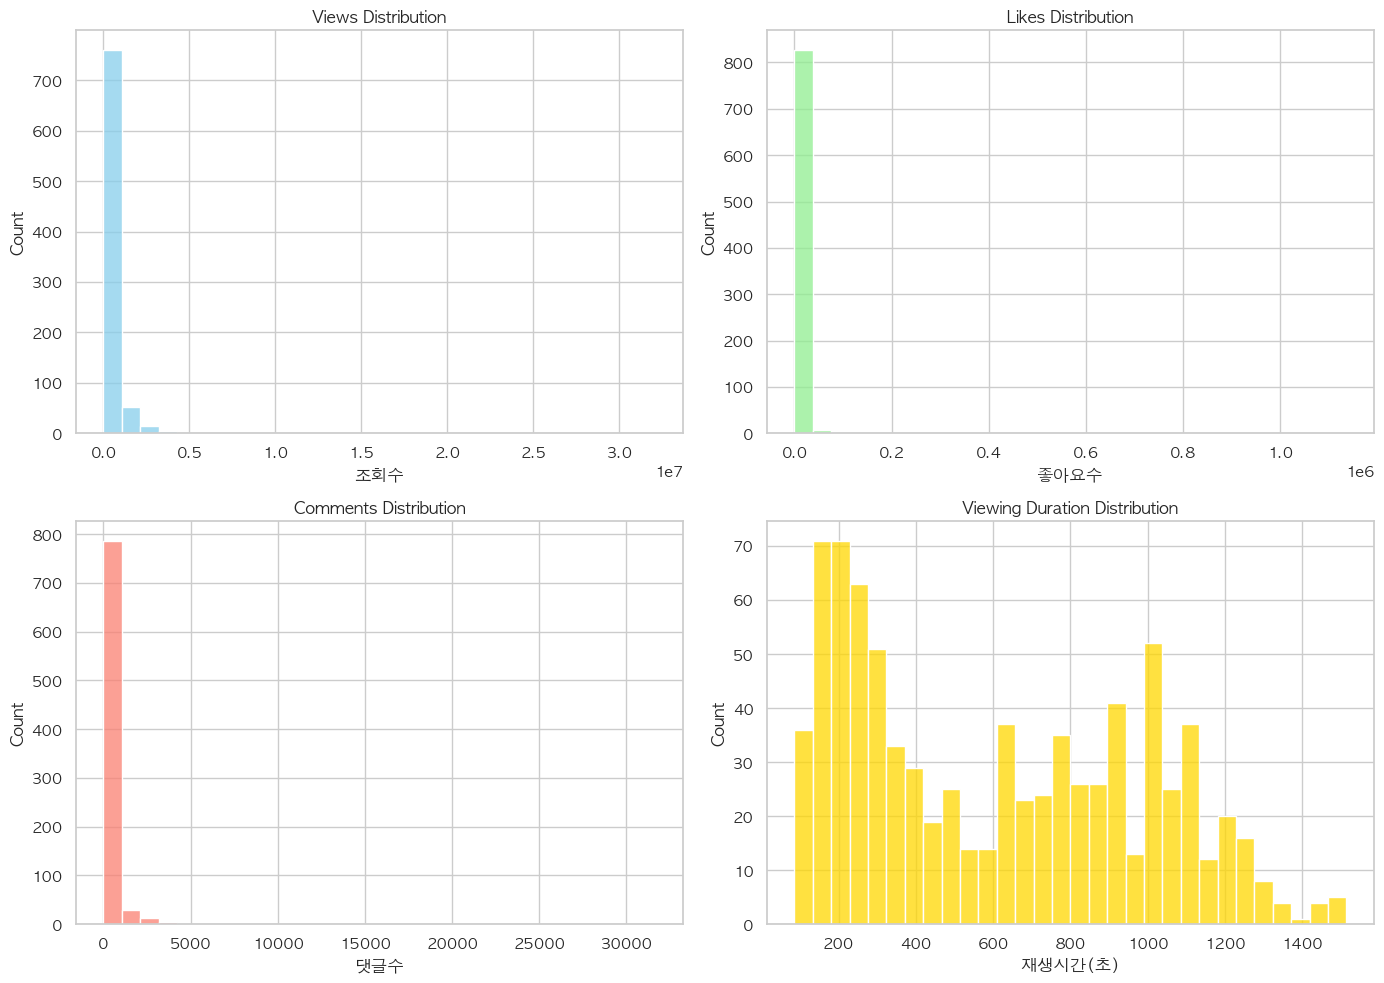

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 처리


fig, axes = plt.subplots(2, 2, figsize=(14, 10))


sns.histplot(merged_df['조회수'], bins=30, ax=axes[0, 0], color='skyblue').set_title('Views Distribution')
sns.histplot(merged_df['좋아요수'], bins=30, ax=axes[0, 1], color='lightgreen').set_title('Likes Distribution')
sns.histplot(merged_df['댓글수'], bins=30, ax=axes[1, 0], color='salmon').set_title('Comments Distribution')
sns.histplot(merged_df['재생시간(초)'], bins=30, ax=axes[1, 1], color='gold').set_title('Viewing Duration Distribution')

plt.tight_layout()
plt.show()


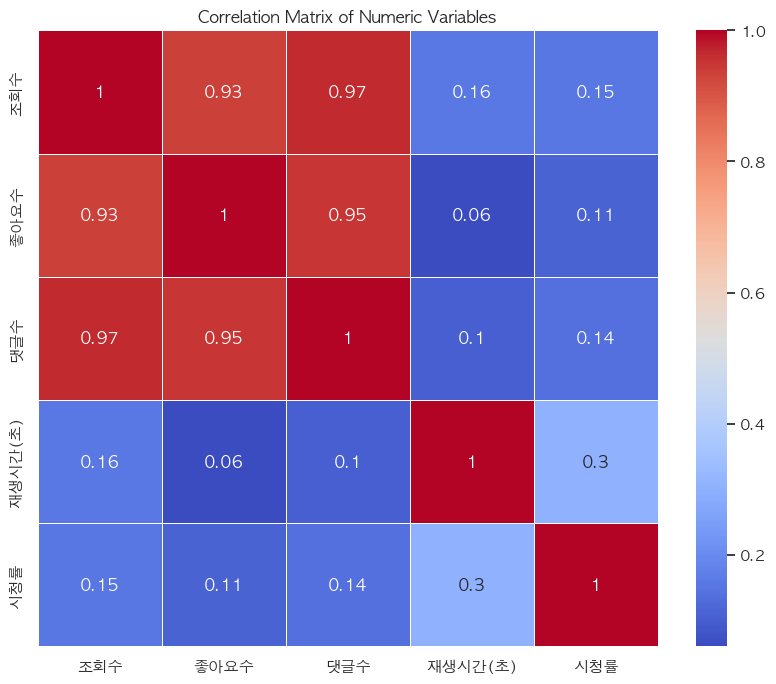

In [93]:

correlation_matrix = merged_df[['조회수', '좋아요수', '댓글수', '재생시간(초)', '시청률']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


- 시청률에 대해서 조회수 좋아요 수 댓글수 재생시간 은 관련이 적음을 확인 하였습니다. 
-> 유튜브 채널의 데이터는 시청률과 관련이 적음을 알 수 있습니다.

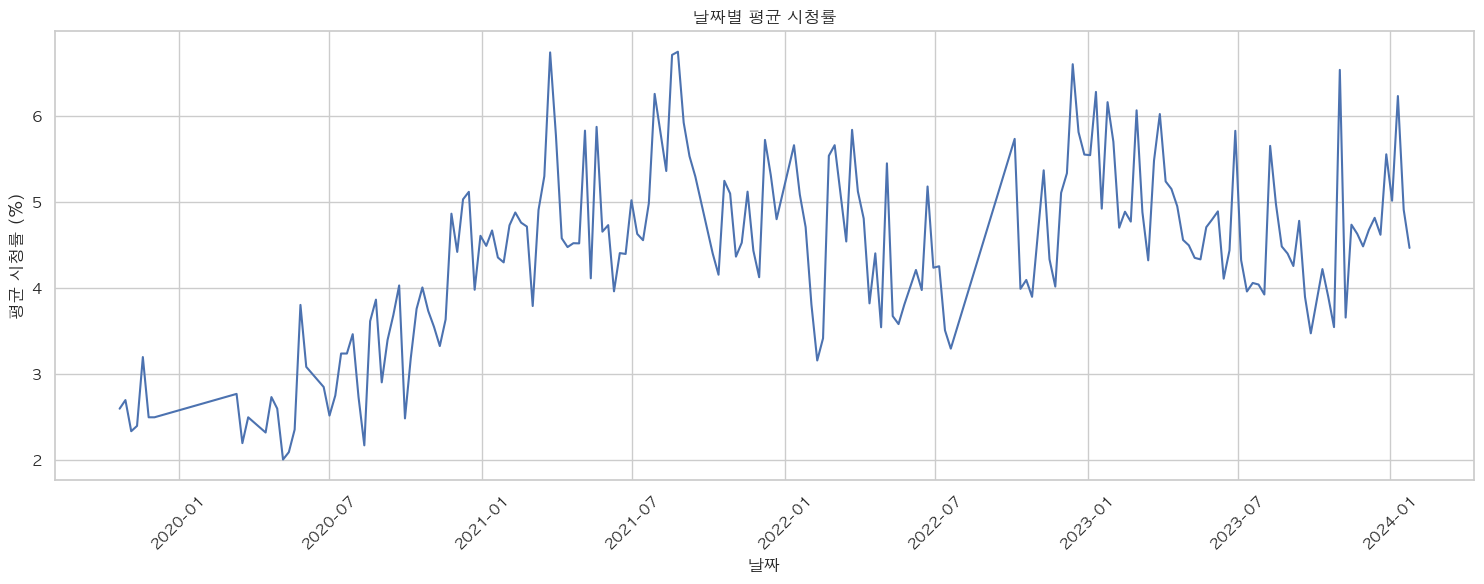

In [94]:
# 날짜별 시청률 시각화를 위해 필요한 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt
import seaborn as sns

# '날짜' 컬럼을 datetime 타입으로 변환합니다.
merged_df['날짜'] = pd.to_datetime(merged_df['날짜'])

# 날짜별로 시청률의 평균을 계산합니다.
date_viewership = merged_df.groupby('날짜')['시청률'].mean().reset_index()

# 시청률을 날짜별로 시각화합니다.
plt.figure(figsize=(15, 6))
sns.lineplot(x='날짜', y='시청률', data=date_viewership)
plt.title('날짜별 평균 시청률')
plt.xlabel('날짜')
plt.ylabel('평균 시청률 (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프를 표시합니다.
plt.show()


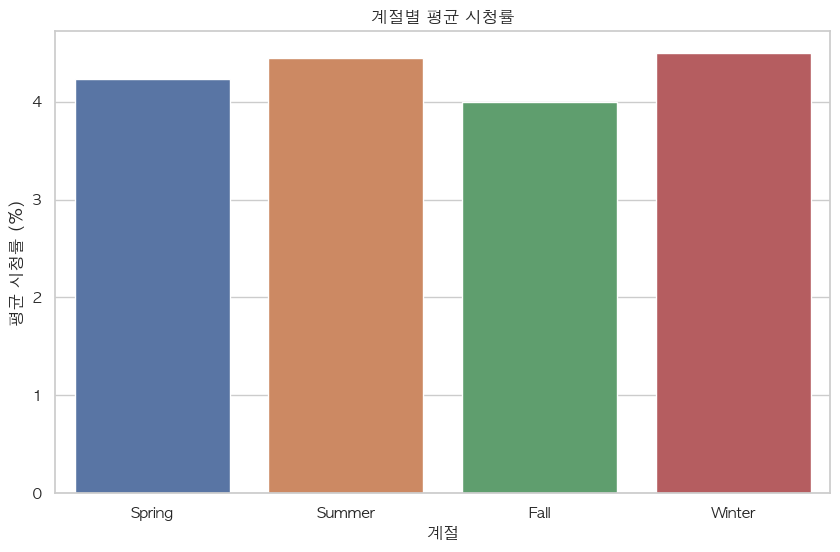

In [95]:
# 계절을 매핑하는 함수를 정의합니다.
def map_season(month):
    if month in [11, 12, 1, 2]:  # 겨울
        return 'Winter'
    elif month in [3, 4, 5]:  # 봄
        return 'Spring'
    elif month in [6, 7, 8]:  # 여름
        return 'Summer'
    else:
        return 'Fall'  # 가을

# '날짜' 컬럼에서 월을 추출하고, 이를 사용하여 계절 컬럼을 생성합니다.
merged_df['Season'] = merged_df['날짜'].dt.month.apply(map_season)

# 계절별로 시청률의 평균을 계산합니다.
season_viewership = merged_df.groupby('Season')['시청률'].mean().reset_index()

# 계절별 시청률을 시각화합니다.
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='시청률', data=season_viewership, order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('계절별 평균 시청률')
plt.xlabel('계절')
plt.ylabel('평균 시청률 (%)')

# 그래프를 표시합니다.
plt.show()


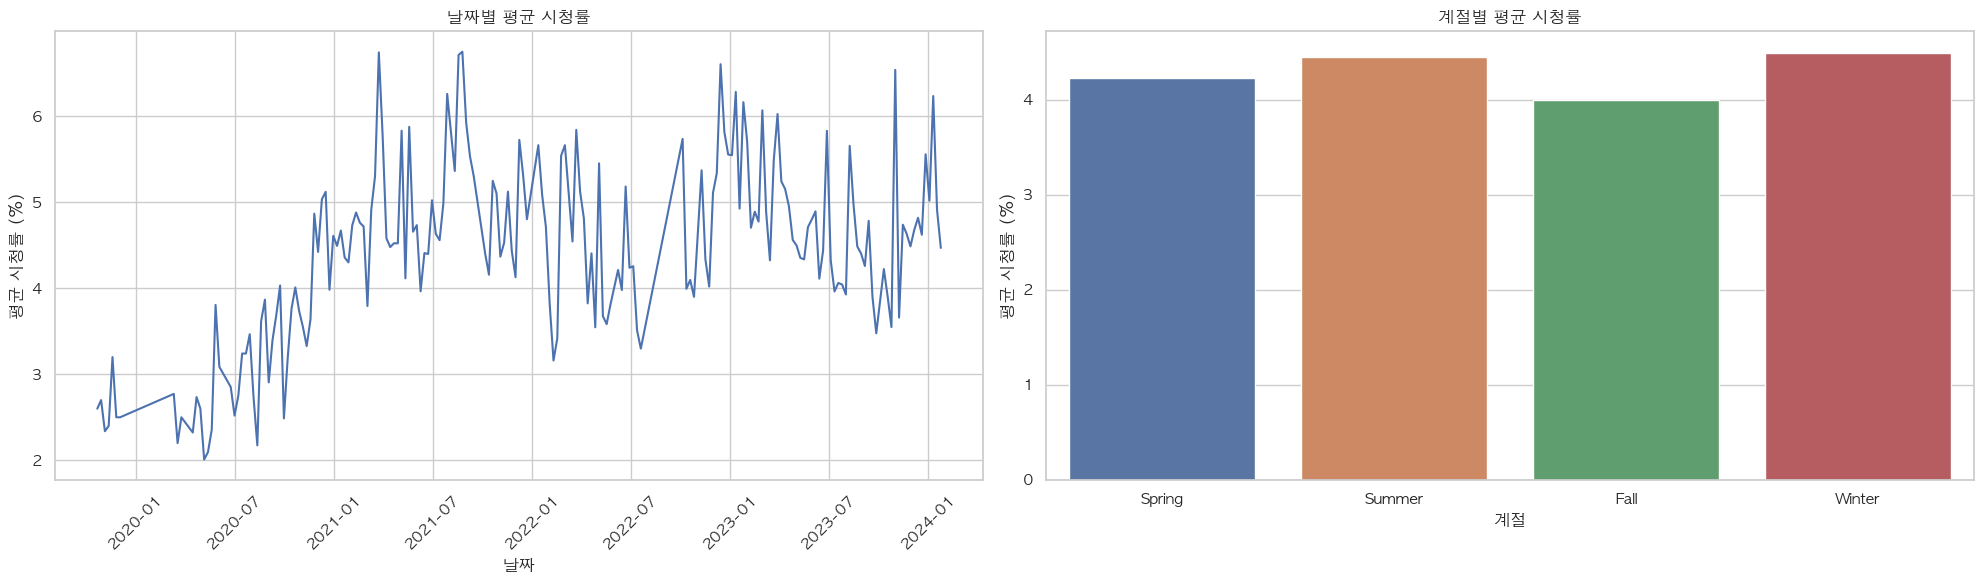

In [96]:
# 두 개의 시각화(날짜별 평균 시청률 및 계절별 평균 시청률)를 나란히 표시하기 위한 코드를 작성합니다.

# 날짜별 평균 시청률 데이터 준비
date_viewership = merged_df.groupby('날짜')['시청률'].mean().reset_index()

# 계절별 평균 시청률 데이터 준비 (이전에 이미 계산함)

# 시각화
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# 날짜별 평균 시청률 시각화
sns.lineplot(x='날짜', y='시청률', data=date_viewership, ax=axs[0])
axs[0].set_title('날짜별 평균 시청률')
axs[0].set_xlabel('날짜')
axs[0].set_ylabel('평균 시청률 (%)')
axs[0].tick_params(axis='x', rotation=45)

# 계절별 평균 시청률 시각화
sns.barplot(x='Season', y='시청률', data=season_viewership, order=['Spring', 'Summer', 'Fall', 'Winter'], ax=axs[1])
axs[1].set_title('계절별 평균 시청률')
axs[1].set_xlabel('계절')
axs[1].set_ylabel('평균 시청률 (%)')

plt.tight_layout()
plt.show()


# 탐색적 데이터 분석(EDA) 결과 요약

## 주요 발견 사항

1. **시청률의 점차적인 우상향적 모습**
   - 데이터 분석을 통해, 전반적으로 시청률이 점차적으로 우상향하는 경향을 확인할 수 있었습니다. 이는 콘텐츠의 질이 향상되거나, 특정 출연자 또는 에피소드가 시청자들의 관심을 끌었기 때문일 수 있습니다.

2. **2023년 실내 마스크 의무에서 권고로 변경**
   - 2023년부터 실내 마스크 착용 의무가 권고 사항으로 변경됨에 따라, 코로나19에 대한 경계심이 낮아지면서 사람들의 외부 활동이 증가했습니다. 이 변화는 우상향하던 시청률의 증가세가 둔화되거나 멈추는 원인이 되었을 수 있습니다.
   - 22년 5 월 야외 마스크 해제
   - 22년 9 월 26일 실외 마스크 전면 해제
   - 23년 1 월 30일 실내 마스크 의무에서 권고
   - 23년 6 월 실내 마스크 해제
   
   

3. **계절적 변화에 따른 시청률 하락**
   - 외부 활동하기 좋은 봄과 가을에 따른 평균 시청률 하락.


## 결론

이번 탐색적 데이터 분석(EDA)을 통해, 시청률에 영향을 미치는 다양한 요소들을 확인할 수 있었습니다. 특히 계절적 변화, 사회적 상황의 변화가 시청률에 미치는 영향을 분석함으로써, 미디어 콘텐츠의 소비 패턴을 이해하는 데 도움이 되었습니다.


# 추가 EDA

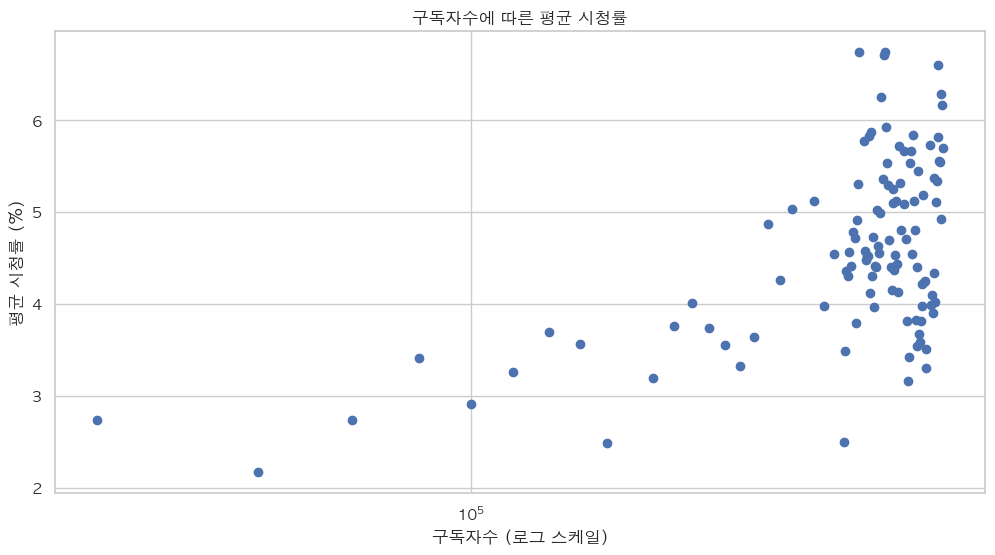

In [97]:
# 구독자수가 실제로 존재하는 값들을 기준으로 구간을 나누지 않고, 구독자수 자체를 사용하여 시청률 변화를 시각화합니다.
# 이 경우, 구독자수의 분포가 넓기 때문에, 각 구독자수 값을 그대로 사용하는 대신 구독자수별 평균 시청률을 계산하여 시각화합니다.

# 구독자수별 평균 시청률을 계산합니다.
subscriber_viewership = merged_df.groupby('구독자수_numeric')['시청률'].mean().reset_index()

# 구독자수가 매우 많은 범위에 걸쳐 있으므로, x축을 로그 스케일로 표현합니다.
plt.figure(figsize=(12, 6))
plt.scatter(subscriber_viewership['구독자수_numeric'], subscriber_viewership['시청률'])
plt.xscale('log')  # 구독자수를 로그 스케일로 표현
plt.title('구독자수에 따른 평균 시청률')
plt.xlabel('구독자수 (로그 스케일)')
plt.ylabel('평균 시청률 (%)')
plt.grid(True)

# 그래프를 표시합니다.
plt.show()


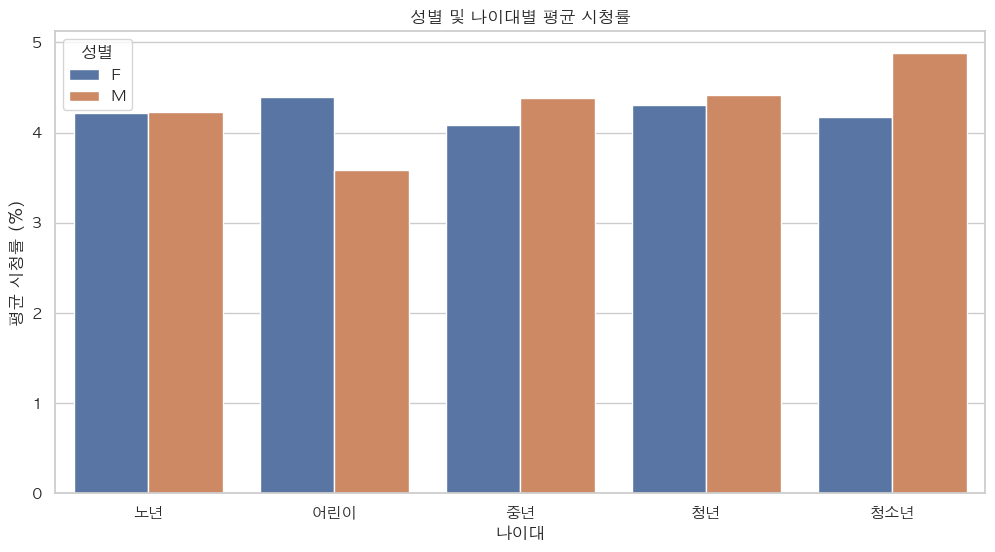

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 처리

# 성별 및 나이대별 시청률 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='나이', y='시청률', hue='성별', data=gender_age_viewership)
plt.title('성별 및 나이대별 평균 시청률')
plt.xlabel('나이대')
plt.ylabel('평균 시청률 (%)')
plt.legend(title='성별')  # 범례 추가

# 그래프 표시
plt.show()


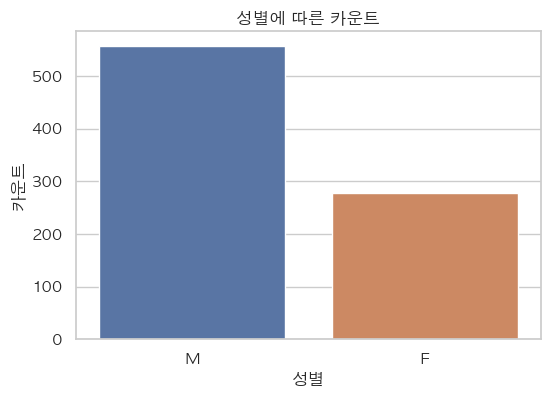

In [99]:
# 성별에 따른 남자와 여자의 카운트를 계산합니다.
gender_counts = merged_df['성별'].value_counts()

# 시각화합니다.
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('성별에 따른 카운트')
plt.xlabel('성별')
plt.ylabel('카운트')
plt.show()


['서비스' '기타' '산업' '전문기술' '운동선수' '예술인' '연예인' '사회복지' '학생']


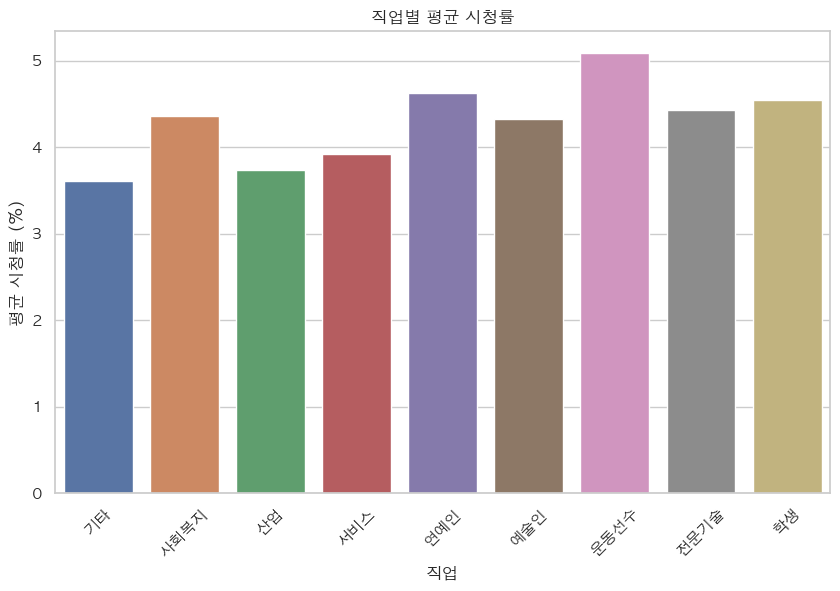

In [100]:
# 직업별 시청률을 분석하기 위해 직업 정보가 있는 컬럼을 확인합니다.
print(merged_df['직업'].unique())

# 직업별 시청률을 계산합니다.
occupation_viewership = merged_df.groupby('직업')['시청률'].mean().reset_index()

# 시각화합니다.
plt.figure(figsize=(10, 6))
sns.barplot(x='직업', y='시청률', data=occupation_viewership)
plt.title('직업별 평균 시청률')
plt.xlabel('직업')
plt.ylabel('평균 시청률 (%)')
plt.xticks(rotation=45)
plt.show()


**추가적인 EDA**
- 유튜브의 구독자 수는 유키즈에 대한 관심을 나타내는 지표임으로 시청률과 관련이 있어보인다.
- 유키즈의 출연자들이 남성인 비중이 높으나 여성이면서 청소년대 나이가 시청률이 높음을 볼 수 있다.
- 직업별 시청률 변화도를 통해 직업별 시청률에 영향이 미치는 듯 하다.